### Introduction

The goal of this notebook is to build from scratch a neural network for an image classficiation task.

This is to have a good grasp of deep learning concepts ..

## Plan

**1-** Prepare the dataset

**2-** Implementing the forward pass

**3-** Implementing the backwad pass

**4-** Evaluating the performance of the nn

**5-** Experiments with the nn parametres and how they affect the performances 

Some questions that we want to answer are : 

* Can we find some correlation between the variance in the dataset and the size of the neural network? 
* Is the bias part of the neurons important in the task?

### 1-  Loading the dataset

In [1]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the loaded data
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test data shape:", x_test.shape)  # (10000, 28, 28)
print("Test labels shape:", y_test.shape)  # (10000,)

11490434/11490434 [==============================] - 5s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


###  2-  Visualizing the dataset

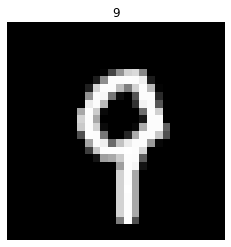

In [13]:
import matplotlib.pyplot as plt
import numpy as np

random_idx = np.random.randint(1000)

image = x_train[random_idx]
label = y_train[random_idx]

plt.imshow(image, cmap='gray')  # Display the image
plt.axis('off')  # Turn off the axes
plt.title(label)
plt.show()  # Show the image

==> Each image is a **28*28** pixels, which gives a list of **784** elements

### 3- Implementing the forward pass

Our neural network, would be such that there is only one hidden layer with **300** neurons, and the output layer with **10**neurons

For now, the activations functions would be all linear, and in to generate the output we take the argmax.

Our loss function will be the Mean Squared Error, aka **MSE**

In [22]:
input_layer = image.flatten()

In [54]:
## Initializing the weights linking the input layer with the hidden layer

size_input_layer = 784
size_hidden_layer = 300
size_output_layer = 10


weight_input_hidden = np.random.random((size_hidden_layer, size_input_layer))
weight_hidden_output = np.random.random((size_hidden_layer, size_output_layer))

In [55]:
# Hidden layer result
hidden_representation = np.dot(weight_input_hidden , input_layer)
hidden_representation.shape

(300,)

In [56]:
mi = hidden_representation.min()
ma = hidden_representation.max()

# min max normalization
norm_hidden_representation = (hidden_representation - mi)/(ma-mi)

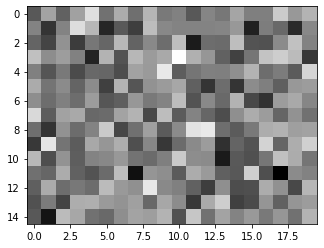

In [57]:
plt.imshow(norm_hidden_representation.reshape(15,20), cmap='gray')  # Display the image

In [61]:
## hidden output result 

ouput_result = np.dot(norm_hidden_representation, weight_hidden_output)
ouput_result.shape

(10,)

In [64]:
# Result of the forward pass
ouput_result.argmax()

5